<h1 align="center">IPL Winner Prediction - Mini Project Data science</h1>

## Group Members
 
- Vikram Shinde	322065 - 21920048
- Shubham Chavan	322070 - 21920081
- Avdhut Sagare	322073 - 21920143
- Priyanka Raut	322074 - U1510177


In [1]:
# import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Reading the dataset
match_df = pd.read_csv(r'C:\Users\vicky\Downloads\matches.csv')


In [7]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Exploratory Data Analysis

In [12]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [13]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

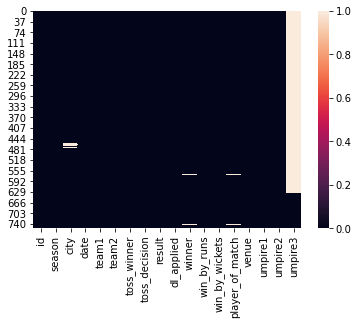

In [5]:
# check how many null values are present
sns.heatmap(match_df.isnull())

In [14]:
match_df[match_df['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [17]:
# replacing null results
match_df['winner'].fillna('Draw',inplace=True)

In [18]:
match_df[match_df['winner'].isnull()==True]
# No null value

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [23]:
team_encodings = {
    'Mumbai Indians':1,
'Chennai Super Kings':2,
'Kolkata Knight Riders':3,
'Royal Challengers Bangalore':4,
'Kings XI Punjab':5,
'Rajasthan Royals':6,
'Delhi Daredevils':7,
'Sunrisers Hyderabad':8,
'Deccan Chargers':9,
'Gujarat Lions':10,
'Pune Warriors':11,
'Rising Pune Supergiant':12,
'Delhi Capitals':13,
'Kochi Tuskers Kerala':14,
'Rising Pune Supergiants':12,
    'Draw':15
}




team_encoding_dict = {
    'team1':team_encodings,
    'team2':team_encodings,
    'toss_winner':team_encodings,
    'winner':team_encodings
}

In [24]:
match_df.replace(team_encoding_dict,inplace=True)

In [25]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,8,4,4,field,normal,0,8,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,12,12,field,normal,0,12,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,10,3,3,field,normal,0,3,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,12,5,5,field,normal,0,5,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,4,7,4,bat,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [26]:
# Missing values in city column

In [27]:
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Ranchi              7
Cape Town           7
Cuttack             7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [28]:
match_df[match_df['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,4,4,field,normal,0,4,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,3,7,3,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,2,6,6,field,normal,0,2,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,8,7,8,bat,normal,0,8,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,2,1,bat,normal,0,2,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,4,5,5,field,normal,0,5,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,8,1,1,field,normal,0,8,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [29]:
match_df['city'].fillna('Dubai',inplace=True)

In [30]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [31]:
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.074074,5.199735,5.084656,0.025132,4.882275,13.283069,3.350529
std,3464.478148,3.366895,3.087220,3.072381,3.116838,0.156630,3.137579,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,2.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,4.000000,0.000000,4.000000
75%,567.250000,2016.000000,7.000000,7.000000,7.000000,0.000000,7.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


In [32]:
match_df.describe(include=['object'])

,city,date,toss_decision,result,player_of_match,venue,umpire1,umpire2,umpire3
count,756,756,756,756,752,756,754,754,119
unique,33,546,2,3,226,41,61,65,25
top,Mumbai,2013-04-23,field,normal,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,Nitin Menon
freq,101,2,463,743,21,77,73,57,10


# Toss wins and match wins by each team

In [48]:
total_wins = match_df['toss_winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

In [44]:
for idx, val in total_wins.iteritems():
    print(f"{list(team_encoding_dict['winner'].keys())[idx-1] }--> {total_wins[idx]}")

Mumbai Indians--> 98
Kolkata Knight Riders--> 92
Chennai Super Kings--> 89
Kings XI Punjab--> 81
Royal Challengers Bangalore--> 81
Delhi Daredevils--> 80
Rajasthan Royals--> 80
Sunrisers Hyderabad--> 46
Deccan Chargers--> 43
Pune Warriors--> 20
Gujarat Lions--> 15
Rising Pune Supergiant--> 13
Delhi Capitals--> 10
Kochi Tuskers Kerala--> 8


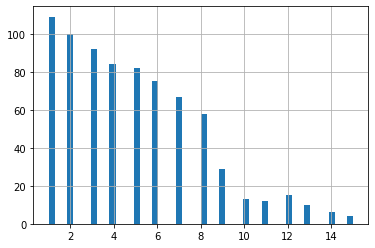

In [46]:
match_df['winner'].hist(bins=50)

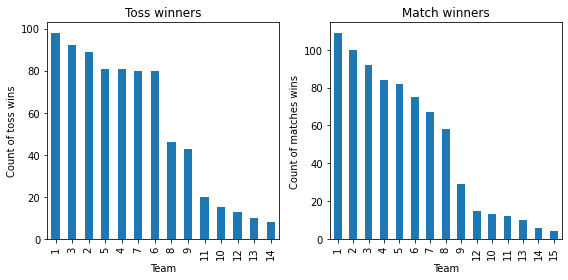

In [53]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Team")
ax1.set_ylabel("Count of toss wins")
ax1.set_title("Toss winners")
total_wins.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Team")
ax2.set_ylabel("Count of matches wins")
ax2.set_title("Match winners")
match_wins.plot(kind="bar")

plt.tight_layout()

In [54]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Dropping redundant columns 

In [56]:
match_df = match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]

In [57]:
match_df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,8,4,Hyderabad,field,4,"Rajiv Gandhi International Stadium, Uppal",8
1,1,12,Pune,field,12,Maharashtra Cricket Association Stadium,12
2,10,3,Rajkot,field,3,Saurashtra Cricket Association Stadium,3
3,12,5,Indore,field,5,Holkar Cricket Stadium,5
4,4,7,Bangalore,bat,4,M Chinnaswamy Stadium,4


In [59]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()

for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    print()
            

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]

['bat' 'field']

['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Punjab Cricket Association Stadium, Mohali'
 'Rajiv Gandhi International Stadium, Uppal'
 'Rajiv Gandhi Intl. Cricket Stadium' 'Sardar Patel Stadium, Motera'

<ipython-input-59-378c28eb65c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df[ftr] = encoder.fit_transform(match_df[ftr])


In [60]:
match_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,8,4,15,1,4,28,8
1,1,12,27,1,12,21,12
2,10,3,29,1,3,31,3
3,12,5,16,1,5,13,5
4,4,7,2,0,4,17,4
...,...,...,...,...,...,...,...
751,3,1,24,1,1,40,1
752,2,1,8,0,2,18,1
753,8,13,32,1,13,0,13
754,13,2,32,1,2,0,2


In [61]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   team1          756 non-null    int64
 1   team2          756 non-null    int64
 2   city           756 non-null    int64
 3   toss_decision  756 non-null    int32
 4   toss_winner    756 non-null    int64
 5   venue          756 non-null    int32
 6   winner         756 non-null    int64
dtypes: int32(2), int64(5)
memory usage: 35.6 KB


# Machine learning

In [62]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df,test_size=0.2, random_state=5)


(604, 7)


In [65]:
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_score(model, data, predictor, target):
    model.fit(data[predictor], data[target])
    prediction = model.predict(data[predictor])
    accuracy = accuracy_score(prediction,data[target])
    print("Accuracy {:.2f}".format(accuracy))
    scores = cross_val_score(model,data[predictor],data[target],scoring = "neg_mean_squared_error", cv=5)
    print("Cross validation scores {}".format(np.sqrt(-scores)))
    print(f"Average {np.sqrt(-scores).mean()}")

In [70]:
target_var = ['winner']
predictor_var = ['team1','team2','city','toss_decision','toss_winner','venue']
model = LogisticRegression()

In [71]:
print_model_score(model,train_df,predictor_var,target_var)

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only

Accuracy 0.32


C:\Users\vicky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

Cross validation scores [3.19865674 3.1347163  3.07751107 3.24992053 3.14775052]
Average 3.1617110328867764


In [72]:
# random forest
model  = RandomForestClassifier(n_estimators=100)

print_model_score(model, train_df,predictor_var,target_var)

<ipython-input-69-13a358aca277>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data[predictor], data[target])


Accuracy 0.89


C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

Cross validation scores [3.33278232 3.14130046 3.03560143 3.49024615 3.38624669]
Average 3.277235411369864


In [74]:
team1='Mumbai Indians'
team2='Sunrisers Hyderabad'
toss_winner='Sunrisers Hyderabad'
inp = [team_encoding_dict['team1'][team1],team_encoding_dict['team2'][team2],'14',team_encoding_dict['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encoding_dict['team1'].values()).index(output)]}")

[['1' '8' '14' '8' '2' '1']]
The winner would be: Mumbai Indians
